<a href="https://colab.research.google.com/github/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCVK JOBSHEET 5**

**Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

---



Nama : Ratnasari

NIM : 2241720007

Kelas : TI 3D


---


link jobsheet : https://drive.google.com/file/d/1bYz51UjYMmh-c9kdVh3AUvlMiUfKKuHm/view

link github : https://github.com/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week7.ipynb



Import Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**Konvolusi tanpa library**

membuat fungsi konvolusi

Fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan,
2. kernel berupa matriks untuk memfilter citra
3. nilai stride / besarnya pengeseran untuk setia konvolusi,
4. nilai pad yang akan ditambahkan pada citra


In [5]:
import numpy as np

def convolution2d(image, kernel, stride, padding):
    # Apply padding pada citra
    image = np.pad(image, padding, mode='constant', constant_values=0)

    # Mengambil ukuran kernel dan citra
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    # Calculate the size of the output image
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # Initialize the output image
    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    # Convolution process
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height,
                                           x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

    return new_image


Penjelasan

---

- image: Array 2D (grayscale) dari citra yang akan dikonvolusi.
- kernel: Filter 2D (misalnya, kernel Gaussian, Sobel, dsb.) yang digunakan untuk operasi konvolusi.
- stride: Langkah perpindahan kernel saat melintasi citra.
- padding: Jumlah piksel kosong yang ditambahkan di sekitar tepi citra untuk mempertahankan ukuran citra hasil atau untuk menangani piksel tepi saat proses konvolusi.
- np.pad: Menambahkan padding (piksel kosong, 0) di sekitar citra asli.
- kernel.shape: Mendapatkan dimensi kernel (tinggi dan lebar).
- image.shape: Mendapatkan dimensi citra yang telah dipadding.
- Dua loop for digunakan untuk mengiterasi setiap piksel dalam citra hasil.
- y * stride dan x * stride menentukan posisi awal dari kernel saat melintasi citra.
- image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width]: Potongan citra yang sedang dioperasikan oleh kernel pada posisi saat ini.
- np.sum(): Menghitung jumlah dari hasil perkalian elemen-elemen dari kernel dan area citra yang sedang dioperasikan.
- Nilai hasil ini kemudian dimasukkan ke dalam new_image pada posisi [y, x].

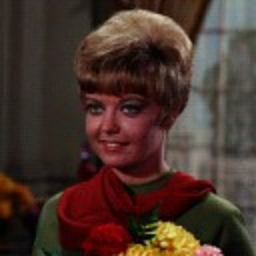

In [31]:
#img_m fungsi yg berisi citra asli dalam format BGR yg mengambil dari drive melalui path.
img_m = cv.imread('/content/drive/MyDrive/ratna/female.jpg')
#img_s berisi citra asli yang telah diubah ukuran (disini saya perbesar ukuran nya pada fx dan fy).
img_s = cv.resize(img_m, (0,0), fx=2, fy=2)
#img_gray berisi citra asli yang telah diubah menjadi citra grayscale.
img_gray = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

cv2_imshow(img_s)

**Sharpen**

---



In [32]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])


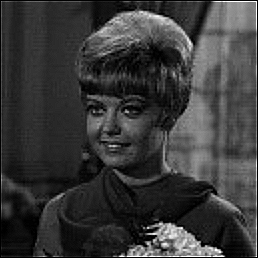

In [33]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

# Jadi kode ini Digunakan untuk menampilkan hasil dari operasi konvolusi menggunakan kernel sharpen pada citra grayscale img_gray.

**Emboss**

---



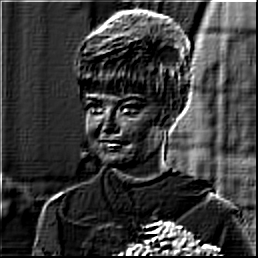

In [34]:
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

**Left Sobel Edge Detection**

---



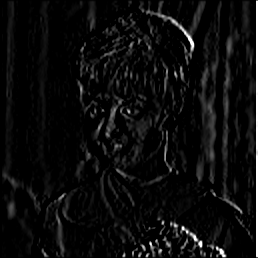

In [35]:
kernel_lsed = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_lsed, 1, 2))

**Canny Edge Detection**

---



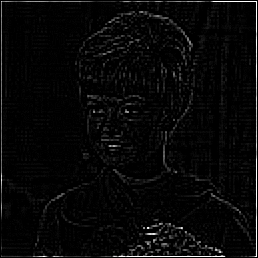

In [36]:
kernel_ced = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_ced, 1, 2))

**Prewitt Edge Detection**

---



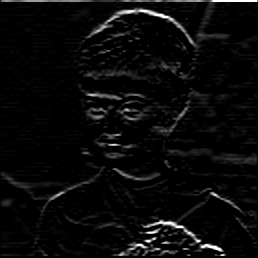

In [37]:
kernel_ped = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_ped, 1, 2))

**5x5 Gaussian Blur**

---



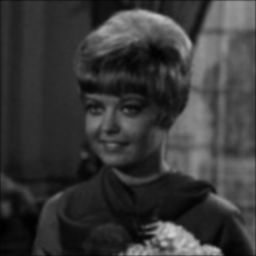

In [38]:
kernel_size = 5 #ukuran kernel

sigma = math.sqrt(kernel_size) # menghitung nilai sigma

# Buat kernel gaussian
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

kernel_gb = (1/256) * np.array([[1, 4, 6, 4, 1],
                                    [4, 16, 24, 16, 4],
                                    [6, 24, 36, 24, 6],
                                    [4, 16, 24, 16, 4],
                                    [1, 4, 6, 4, 1]])
cv2_imshow(convolution2d(img_gray,kernel_gb,1,2))

Penjelasan

---

- cv.getGaussianKernel: Fungsi ini menghasilkan kernel Gaussian 1D berbentuk kolom dengan ukuran yang ditentukan (kernel_size) dan nilai sigma (sigma). Kernel ini adalah kernel Gaussian yang digunakan untuk operasi Gaussian blur.
- gaussian_kernel @ gaussian_kernel.transpose(): Menghasilkan kernel Gaussian 2D dari kernel 1D yang diperoleh sebelumnya. Ini dilakukan dengan mengalikan kernel 1D dengan transpose-nya, menghasilkan kernel 2D simetris. Ini adalah cara umum untuk membentuk kernel Gaussian 2D dari versi 1D.

**21x21 Gaussian Blur**

---



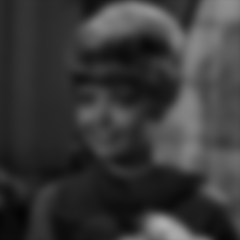

In [39]:
kernel_size = 21

sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))

Dibandingkan dengan kernel 5x5 hasil Kernel 21x21 akan memberikan gambar yang jauh lebih blur,  karena cakupan area kernel yang lebih besar dalam konvolusi.
